## SciPy - Librairie d'algorithmes pour le calcul scientifique en Python

Librairie de calcul numérique : intégration numérique, résolution d’équations différentielles, algèbre
linéaire, traitement du signal, optimisation…

In [1]:
 #Pour intégrer les graphes à votre notebook, il suffit de faire
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Introduction

SciPy s'appuie sur NumPy.

SciPy fournit des implémentations efficaces d'algorithmes standards.

Certains des sujets couverts par SciPy:

* Fonctions Spéciales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Intégration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimisation ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformées de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Traitement du Signal ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Algèbre Linéaire ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Matrices *Sparses* et Algèbre Linéaire Sparse ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistiques ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Traitement d'images N-dimensionelles ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Lecture/Ecriture Fichiers IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Durant ce cours on abordera certains de ces modules.

Pour utiliser un module de SciPy dans un programme Python il faut commencer par l'importer.

Voici un exemple avec le module *linalg*

In [3]:
from scipy import linalg

On aura besoin de NumPy:

In [4]:
import numpy as np

Et de matplotlib/pylab:

In [5]:
# et JUSTE POUR MOI (pour avoir les figures dans le notebook)
%matplotlib inline
import matplotlib.pyplot as plt

### Fonctions Spéciales

Un grand nombre de fonctions importantes, notamment en physique, sont disponibles dans le module *scipy.special*

Pour plus de détails: http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Un exemple avec les fonctions de Bessel:

In [6]:
# jn : Bessel de premier type
# yn : Bessel de deuxième type
from scipy.special import jn, yn

In [7]:
jn?

In [8]:
n = 0    # ordre
x = 0.0

# Bessel de premier type
print ("J_%d(%s) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel de deuxième type
print("Y_%d(%s) = %f" % (n, x, yn(n, x)))

J_0(0.0) = 1.000000
Y_0(1.0) = 0.088257


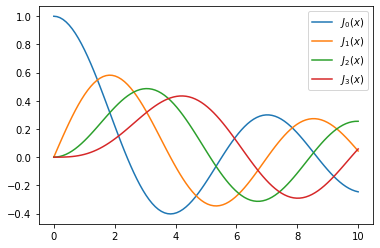

In [9]:
x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
plt.legend()

In [10]:
from scipy import special
special?

### Intégration

#### intégration numerique

L'évaluation numérique de:

$\displaystyle \int_a^b f(x) dx$

est nommée *quadrature* (abbr. quad). SciPy fournit différentes fonctions: par exemple `quad`, `dblquad` et `tplquad` pour les intégrales simples, doubles ou triples.

In [11]:
from scipy.integrate import quad, dblquad, tplquad

In [12]:
quad?

L'usage de base:

In [13]:
# soit une fonction f
def f(x):
    return x

In [14]:
a, b = 1, 2 # intégrale entre a et b

val, abserr = quad(f, a, b)

print ("intégrale =", val, ", erreur =", abserr )

intégrale = 1.5 , erreur = 1.6653345369377348e-14


Exemple intégrale double:

$\int_{x=1}^{2} \int_{y=1}^{x} (x + y^2) dx dy$

In [15]:
dblquad?

In [16]:
def f(y, x):
    return x + y**2

def gfun(x):
    return 1

def hfun(x):
    return x

print(dblquad(f, 1, 2, gfun, hfun))

(1.7500000000000002, 4.7941068289487755e-14)


#### Equations différentielles ordinaires (EDO)

SciPy fournit deux façons de résoudre les EDO: Une API basée sur la fonction `odeint`, et une API orientée-objet basée sur la classe `ode`.

`odeint` est plus simple pour commencer.

Commençons par l'importer:

In [17]:
from scipy.integrate import odeint

Un système d'EDO se formule de la façon standard:

$y' = f(y, t)$

avec 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

et $f$ est une fonction qui fournit les dérivées des fonctions $y_i(t)$. Pour résoudre une EDO il faut spécifier $f$ et les conditions initiales, $y(0)$.

Une fois définies, on peut utiliser `odeint`:

    y_t = odeint(f, y_0, t)

où `t` est un NumPy *array* des coordonnées en temps où résoudre l'EDO. `y_t` est un array avec une ligne pour chaque point du temps `t`, et chaque colonne correspond à la solution `y_i(t)` à chaque point du temps. 

##### Exemple: double pendule

Description: http://en.wikipedia.org/wiki/Double_pendulum

In [18]:
from IPython.core.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Les équations du mouvement du pendule sont données sur la page wikipedia:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

où les $p_{\theta_i}$ sont les moments d'inertie. Pour simplifier le code Python, on peut introduire la variable $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [19]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """The right-hand side of the pendulum ODE"""
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [20]:
# on choisit une condition initiale
x0 = [np.pi/4, np.pi/2, 0, 0]

In [21]:
# les instants du temps: de 0 à 10 secondes
t = np.linspace(0, 10, 250)

In [22]:
# On résout
x = odeint(dx, x0, t)
print(x.shape)

(250, 4)


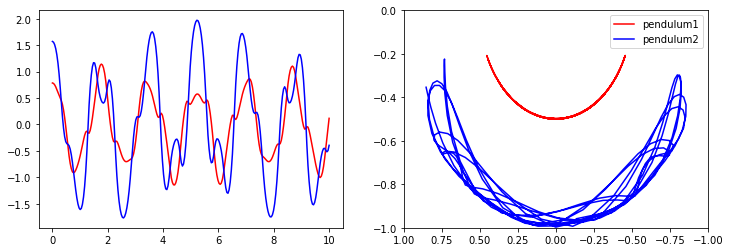

In [23]:
# affichage des angles en fonction du temps
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")

x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])
x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1])
plt.legend()

### Transformées de Fourier

SciPy utilise la librairie [FFTPACK](http://www.netlib.org/fftpack/) écrite en FORTRAN.

Commençons par l'import:

In [24]:
from scipy import fftpack

Nous allons calculer les transformées de Fourier discrètes de fonctions spéciales:

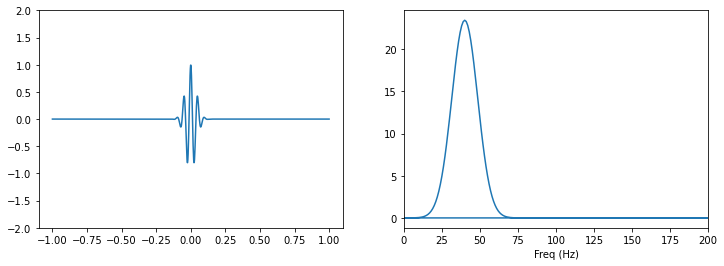

In [25]:
from scipy.signal import gausspulse

t = np.linspace(-1, 1, 1000)
x = gausspulse(t, fc=20, bw=0.5)

# Calcul de la TFD
F = fftpack.fft(x)

# calcul des fréquences en Hz si on suppose un échantillonage à 1000Hz
freqs = fftpack.fftfreq(len(x), 1. / 1000.)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(t, x) # plot du signal
axes[0].set_ylim([-2, 2])

axes[1].plot(freqs, np.abs(F)) # plot du module de la TFD
axes[1].set_xlim([0, 200])
# mask = (freqs > 0) & (freqs < 200)
# axes[0].plot(freqs[mask], abs(F[mask])) # plot du module de la TFD
axes[1].set_xlabel('Freq (Hz)')
plt.show()

### Algèbre linéaire

Le module de SciPy pour l'algèbre linéaire est `linalg`. Il inclut des routines pour la résolution des systèmes linéaires, recherche de vecteur/valeurs propres, SVD, Pivot de Gauss (LU, cholesky), calcul de déterminant etc.

Documentation : http://docs.scipy.org/doc/scipy/reference/linalg.html

##### Résolution d'equations linéaires

Trouver x tel que:

$A x = b$

avec $A$ une matrice et $x,b$ des vecteurs.

In [26]:
A = np.array([[1,0,3], [4,5,12], [7,8,9]], dtype=np.float)
b = np.array([[1,2,3]], dtype=np.float).T
print (A)
print (b)

[[ 1.  0.  3.]
 [ 4.  5. 12.]
 [ 7.  8.  9.]]
[[1.]
 [2.]
 [3.]]


/var/folders/2b/cj2pm60x61s5qlxpmr7g7km00000gn/T/ipykernel_6824/4101427969.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.array([[1,0,3], [4,5,12], [7,8,9]], dtype=np.float)
/var/folders/2b/cj2pm60x61s5qlxpmr7g7km00000gn/T/ipykernel_6824/4101427969.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.array([[1,2,3]], dty

In [27]:
from scipy import linalg
x = linalg.solve(A, b)
print (x)

[[ 0.8       ]
 [-0.4       ]
 [ 0.06666667]]


In [28]:
print (x.shape)
print (b.shape)

(3, 1)
(3, 1)


##### Valeurs propres et vecteurs propres

$\displaystyle A v_n = \lambda_n v_n$

avec $v_n$ le $n$ème vecteur propre et $\lambda_n$ la $n$ème valeur propre.

Les fonctions sont: `eigvals` et `eig`

In [29]:
A = np.random.randn(3, 3)

In [30]:
evals, evecs = linalg.eig(A)

In [31]:
evals

array([0.91414406+1.81276219j, 0.91414406-1.81276219j,
       0.76157097+0.j        ])

In [32]:
evecs

array([[ 0.2128791 -0.43107519j,  0.2128791 +0.43107519j,
        -0.52670265+0.j        ],
       [ 0.25367591+0.26548999j,  0.25367591-0.26548999j,
        -0.5012345 +0.j        ],
       [ 0.7962539 +0.j        ,  0.7962539 -0.j        ,
         0.6865481 +0.j        ]])

Si A est symmétrique

In [33]:
A = A + A.T
# A += A.T  # ATTENTION MARCHE PAS !!!!
evals = linalg.eigvalsh(A)
print (evals)

[-0.54075499  1.81508054  3.90539263]


In [34]:
print (linalg.eigh(A))

(array([-0.54075499,  1.81508054,  3.90539263]), array([[ 0.531646  ,  0.78940516, -0.30690718],
       [-0.45772314,  0.57267589,  0.68009694],
       [ 0.71263038, -0.2210923 ,  0.66578986]]))


##### Opérations matricielles

In [35]:
# inversion
linalg.inv(A)

array([[-0.15524812,  0.64563222, -0.84910387],
       [ 0.64563222, -0.0883216 ,  0.64939326],
       [-0.84910387,  0.64939326, -0.7987007 ]])

In [36]:
# vérifier

In [37]:
# déterminant
linalg.det(A)

-3.8331969491783897

In [38]:
# normes
print (linalg.norm(A, ord='fro'))  # frobenius
print (linalg.norm(A, ord=2))
print (linalg.norm(A, ord=np.inf))

4.340394552237356
3.905392625491531
4.579888196899612


### Optimisation

**Objectif**: trouver les minima ou maxima d'une fonction

Doc : http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

On commence par l'import

In [39]:
from scipy import optimize

#### Trouver un minimum

In [40]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

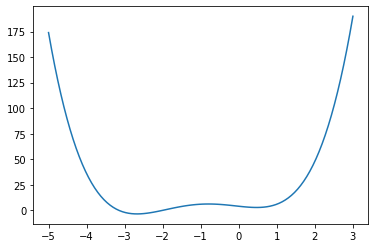

In [41]:
x = np.linspace(-5, 3, 100)
plt.plot(x, f(x))

Nous allons utiliser la fonction `fmin_bfgs`:

In [42]:
x_min = optimize.fmin_bfgs(f, x0=-3)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([-2.67298165])

#### Trouver les zéros d'une fonction

Trouver $x$ tel que $f(x) = 0$. On va utiliser `fsolve`.

In [43]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

/var/folders/2b/cj2pm60x61s5qlxpmr7g7km00000gn/T/ipykernel_6824/2455056392.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(2*np.pi*omega) - omega_c/omega


(-5.0, 5.0)

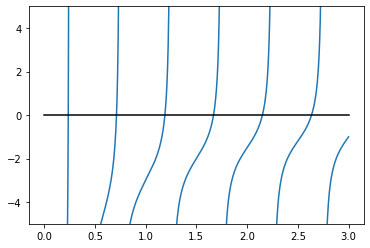

In [44]:
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.nan # get rid of vertical line when the function flip sign
plt.plot(x, y)
plt.plot([0, 3], [0, 0], 'k')
plt.ylim(-5,5)

In [45]:
np.unique(
    (optimize.fsolve(f, np.linspace(0.2, 3, 40))*1000).astype(int)
) / 1000.

array([0.237, 0.712, 1.189, 1.669, 2.15 , 2.635, 3.121, 3.61 ])

In [46]:
optimize.fsolve(f, 0.72)

array([0.71286972])

In [47]:
optimize.fsolve(f, 1.1)

array([1.18990285])

##### Estimation de paramètres de fonctions

In [48]:
from scipy.optimize import curve_fit

def f(x, a, b, c):
    """
    f(x) = a exp(-bx) + c
    """
    return a*np.exp(-b*x) + c

x = np.linspace(0, 4, 50)
y = f(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.randn(len(x))  # ajout de bruit

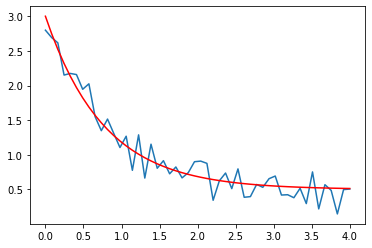

In [49]:
plt.plot(x, yn)
plt.plot(x, y, 'r')

In [50]:
(a, b, c), _ = curve_fit(f, x, yn)
print (a, b, c)

2.488415266050443 1.0927540556794324 0.41113802241565106


In [51]:
curve_fit?

On affiche la fonction estimée:

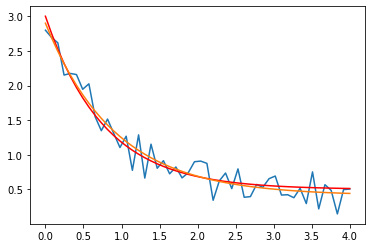

In [52]:
plt.plot(x, yn)
plt.plot(x, y, 'r')
plt.plot(x, f(x, a, b, c))

Dans le cas de polynôme on peut le faire directement avec NumPy

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


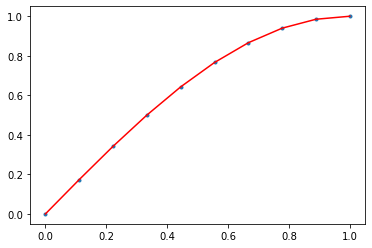

In [53]:
x = np.linspace(0,1,10)
y = np.sin(x * np.pi / 2.)
line = np.polyfit(x, y, deg=10)
plt.plot(x, y, '.')
plt.plot(x, np.polyval(line,x), 'r')
# xx = np.linspace(-5,4,100)
# plt.plot(xx, np.polyval(line,xx), 'g')

### Interpolation

In [54]:
from scipy.interpolate import interp1d

In [55]:
def f(x):
    return np.sin(x)

In [56]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # ajout de bruit
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

In [57]:
from scipy.interpolate import barycentric_interpolate, BarycentricInterpolator
BarycentricInterpolator??

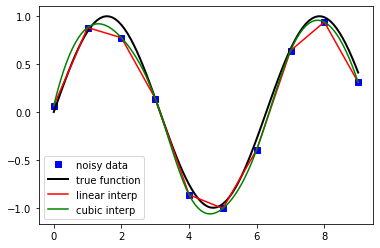

In [58]:
plt.plot(n, y_meas, 'bs', label='noisy data')
plt.plot(x, y_real, 'k', lw=2, label='true function')
plt.plot(x, y_interp1, 'r', label='linear interp')
plt.plot(x, y_interp2, 'g', label='cubic interp')
plt.legend(loc=3);

#### Images

In [59]:
from scipy import ndimage
from scipy import misc
img = misc.ascent()
print (img)
type(img), img.dtype, img.ndim, img.shape

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


(numpy.ndarray, dtype('int64'), 2, (512, 512))

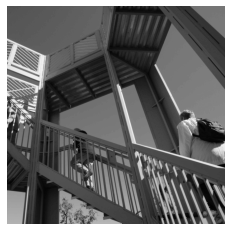

In [60]:
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

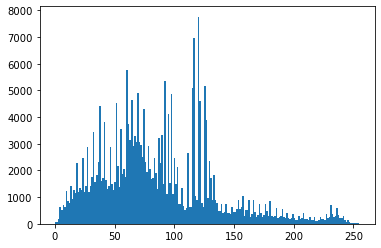

In [61]:
_ = plt.hist(img.reshape(img.size),200)

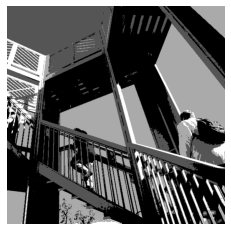

In [62]:
img[img < 70] = 50
img[(img >= 70) & (img < 110)] = 100
img[(img >= 110) & (img < 180)] = 150
img[(img >= 180)] = 200
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Ajout d'un flou

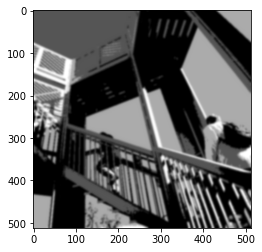

In [63]:
img_flou = ndimage.gaussian_filter(img, sigma=2)
plt.imshow(img_flou, cmap=plt.cm.gray)

Application d'un filtre

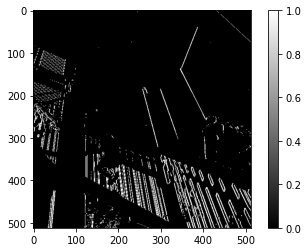

In [64]:
img_sobel = ndimage.filters.sobel(img)
plt.imshow(np.abs(img_sobel) > 200, cmap=plt.cm.gray)
plt.colorbar()

Accéder aux couches RGB d'une image:

(427, 640, 3)


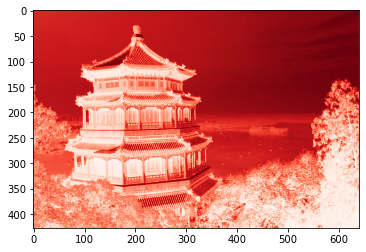

In [65]:
import imageio
img = imageio.imread('china.jpg')
print (img.shape)
plt.imshow(img[:,:,0], cmap=plt.cm.Reds)

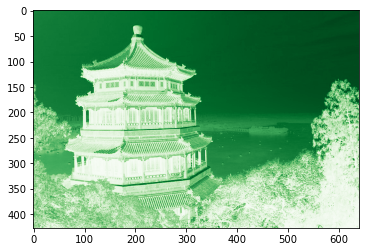

In [66]:
plt.imshow(img[:,:,1], cmap=plt.cm.Greens)

Conversion de l'image en niveaux de gris et affichage:

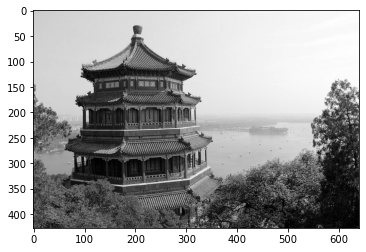

In [67]:
plt.imshow(np.mean(img, axis=2), cmap=plt.cm.gray)

### Pour aller plus loin

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* http://scipy-lectures.github.io
